#### Pavlo Yatluk
#### dz_54

### ЗАВДАННЯ

#### Використовуючи наведений в лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів. Після цього використайте для оцінки похибки Mean Squared Error (синтаксис – за посиланням), в якості оптимізатора – Adam (синтаксис – за посиланням). Порівняйте, чи змінилась похибка та точність.

In [4]:
# встановлення бібліотеки torch
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [5]:
# імпорт бібліотеки torch
import torch
import torch.nn as nn

In [6]:
import matplotlib.pyplot as plt

In [7]:
# встановлення бібліотеки torchviz
pip install torchviz


  Using cached torchviz-0.0.2-py3-none-any.whl


In [8]:
import torchviz

In [11]:
# створення нейронної мережі за допомогою 'штабельного інтерфейсу'
nX, nH1, nH2, nY = 2, 5, 5, 1
model = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),
    nn.Linear(nH2, nY), 
    nn.Sigmoid())

In [13]:
# створення нейронної мережі як нащадка классу nn.Module
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     
         
        self.fc1 = nn.Linear(nX, nH1) 
        self.fc2 = nn.Linear(nH1, nH2)
        self.fc3 = nn.Linear(nH2, nY)             
          
    def forward(self, x):                        
        x = self.fc1(x)                          
        x = nn.Sigmoid()(x)                      
        x = self.fc2(x)                          
        x = nn.Sigmoid()(x)
        x = self.fc3(x)                          
        x = nn.Sigmoid()(x)        
        return x
          
model = ThreeLayersNet(2, 5, 5, 1) 

In [14]:
# створюємо набір модельних даних
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

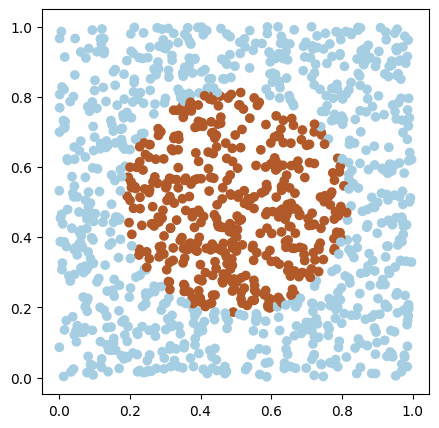

In [15]:
# візуалізація даних 
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [16]:
# задаємо функцію похибки - бінарну кросс-ентропію (BCELoss), та оптимізатор - стохастичний градієнтний спуск (SGD)
model = ThreeLayersNet(2, 5, 5, 1) 

loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [17]:
# проводимо задання парметрів навчання моделі
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                         
        yb = Y[i: i+batch_size]                          
                      
        y = model(xb)                                    
        L = loss(y, yb)                                  
  
        if train:                                       
            optimizer.zero_grad()                             
            L.backward()                                            
            optimizer.step()                             
                                     
        sumL += L.item()                                 
        sumA += (y.round() == yb).float().mean()         
         
        return sumL/numB,  sumA/numB   

In [18]:
# проводимо навчання моделі, задавши кількість епох - 1000
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000                                            
for epoch in range(epochs):                              
    L,A = fit(model, X, Y)                               
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0584 accuracy: 0.0300
epoch:     0 loss: 0.0566 accuracy: 0.0533
epoch:   100 loss: 0.0544 accuracy: 0.0533
epoch:   200 loss: 0.0544 accuracy: 0.0533
epoch:   300 loss: 0.0544 accuracy: 0.0533
epoch:   400 loss: 0.0543 accuracy: 0.0533
epoch:   500 loss: 0.0540 accuracy: 0.0533
epoch:   600 loss: 0.0533 accuracy: 0.0533
epoch:   700 loss: 0.0517 accuracy: 0.0533
epoch:   800 loss: 0.0500 accuracy: 0.0533
epoch:   900 loss: 0.0488 accuracy: 0.0533
epoch:   999 loss: 0.0473 accuracy: 0.0533


In [19]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


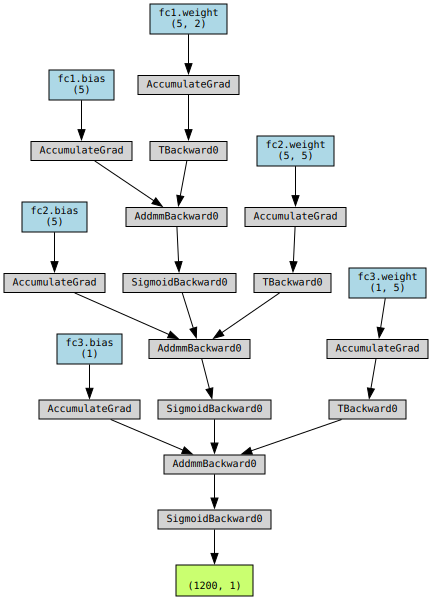

In [20]:
# візуалізуємо функціональну модель нейромережі
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

In [21]:
# задаємо функцію похибки -(MSELoss), та оптимізатор - (Adam)
model = ThreeLayersNet(2, 5, 5, 1) 

loss = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters()) 

In [22]:
# проводимо задання парметрів навчання моделі
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                         
        yb = Y[i: i+batch_size]                          
                      
        y = model(xb)                                    
        L = loss(y, yb)                                  
  
        if train:                                       
            optimizer.zero_grad()                             
            L.backward()                                            
            optimizer.step()                             
                                     
        sumL += L.item()                                 
        sumA += (y.round() == yb).float().mean()         
         
        return sumL/numB,  sumA/numB   

In [23]:
# проводимо навчання моделі, задавши кількість епох - 1000
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000                                            
for epoch in range(epochs):                              
    L,A = fit(model, X, Y)                               
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0198 accuracy: 0.0533
epoch:     0 loss: 0.0198 accuracy: 0.0533
epoch:   100 loss: 0.0192 accuracy: 0.0533
epoch:   200 loss: 0.0192 accuracy: 0.0533
epoch:   300 loss: 0.0192 accuracy: 0.0533
epoch:   400 loss: 0.0192 accuracy: 0.0533
epoch:   500 loss: 0.0192 accuracy: 0.0533
epoch:   600 loss: 0.0192 accuracy: 0.0533
epoch:   700 loss: 0.0192 accuracy: 0.0533
epoch:   800 loss: 0.0192 accuracy: 0.0533
epoch:   900 loss: 0.0191 accuracy: 0.0533
epoch:   999 loss: 0.0191 accuracy: 0.0533


###  ВІДПОВІДЬ

#### При використанні для оцінки моделі нашої тришарової нейронної мережі 1) оцінки похибки ВСЕ та оптимізатора SGD, та 2) оцінки похибки MSE  та оптимізатора Adam - показник accuracy однаковий - 0,0533, а показник втрат loss - зменшився у другому випадку з - 0,0473 до 0,0191